# Linear regression


In [36]:
%matplotlib inline
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)
data=pd.read_csv("http://bit.ly/w-data")
print(data.shape)
data.head()


(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [37]:
X=data["Hours"].values
Y=data["Scores"].values

# Y=MX+C

In [38]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
#print(n)
 #formula
NUMERATOR=0
DENOMINATOR=0
for i in range(n):
    NUMERATOR+=(X[i]-mean_x)*(Y[i]-mean_y)
    DENOMINATOR+=(X[i]-mean_x)**2
m=NUMERATOR/DENOMINATOR
c=mean_y-(m*mean_x)
print(m,c)

9.775803390787475 2.4836734053731746


In [39]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [55]:
#train_test_split()
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
                            

In [56]:
#Training
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


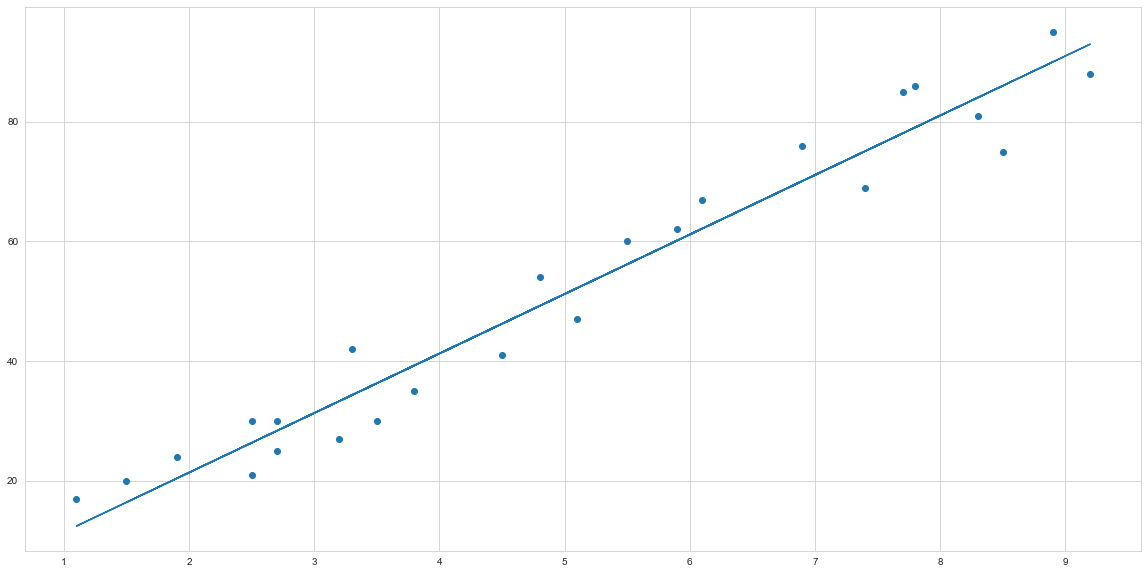

In [57]:
# Regression line
line = reg.coef_*x+reg.intercept_
# Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [58]:
# Testing data - In Hours
print(x_test)

# Predicting the scores
y_pred = reg.predict(x_test) 

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [59]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [60]:
# For 9.25 hours
hours = 9.25

score_pred = reg.predict(np.array([hours]).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_pred[0]))

No of Hours = 9.25
Predicted Score = 93.45860055685802


In [61]:
#Mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.877039354964483
